## Results

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model


In [240]:
def decay_forward_fill(series, half_life=3):
    lam = np.log(2) / max(half_life, 1)
    out, last = [], None
    for v in series:
        if isinstance(v, np.ndarray):
            last = v
            out.append(v)
        else:
            if last is None:
                out.append(None)
            else:
                last = last * np.exp(-lam)
                out.append(last)
    return pd.Series(out, index=series.index)

In [241]:
def get_stock_data(ticker, start, end, embedding_path, half_life=3):

    hist = yf.Ticker(ticker).history(start=start, end=end, interval="1d").reset_index()
    hist['Date'] = pd.to_datetime(hist['Date']).dt.date
    hist['Date'] = pd.to_datetime(hist['Date'])
    
    # Compute log returns and rolling volatility
    hist['Log_Return'] = np.log(hist['Close'] / hist['Close'].shift(1))
    hist['historical_volatility'] = hist['Log_Return'].rolling(window=10).std() * np.sqrt(252)
    
    # Load embeddings
    vectors = pd.read_csv(embedding_path)
    vectors['embedding'] = vectors['embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
    vectors['date'] = pd.to_datetime(vectors['date'])
    
    # Merge and decay-fill
    merged = pd.merge(hist, vectors, left_on='Date', right_on='date', how='left')
    merged = merged[['Date', 'Close', 'historical_volatility', 'embedding']]
    merged['embedding'] = decay_forward_fill(merged['embedding'], half_life)
    return merged

In [242]:
start = "2021-07-19"
end = "2025-10-05"

nvidia = get_stock_data("NVDA", start, end, "article_embeddings/NVDA_Daily_Vectors_finb.csv")
amd = get_stock_data("AMD", start, end, "article_embeddings/AMD_Daily_Vectors_finb.csv")
tsm = get_stock_data("TSM", start, end, "article_embeddings/TSM_Daily_Vectors_finb.csv")
qqq = get_stock_data("QQQ", start, end, "article_embeddings/QQQ_Daily_Vectors_finb.csv")

nvidia

,Date,Close,historical_volatility,embedding
0,2021-07-19,18.737846,NaN,"[-0.817281306, -1.11757958, 0.582749844, -0.00..."
1,2021-07-20,18.570467,NaN,"[-0.634624481, -1.20986199, 0.451949567, 0.096..."
2,2021-07-21,19.366686,NaN,"[-0.723453343, -0.980516672, 0.465799838, 0.25..."
3,2021-07-22,19.550274,NaN,"[-0.977976203, -0.68678987, 0.58059448, 0.1877..."
4,2021-07-23,19.514357,NaN,"[-0.473799646, -0.680217505, 0.634640515, -0.2..."
...,...,...,...,...
1054,2025-09-29,181.839890,0.370958,"[-1.01212847, -1.16598225, 0.586756706, -0.137..."
1055,2025-09-30,186.569611,0.371976,"[-0.724469781, -1.28585148, 0.544337809, -0.12..."
1056,2025-10-01,187.229584,0.324715,"[-1.22172093, -0.874870121, 0.588076651, 0.342..."
1057,2025-10-02,188.879486,0.293812,"[-1.10274291, -1.16406572, 0.346378595, -0.063..."


In [243]:
dates_te = pd.to_datetime(np.array([
    '2024-11-07','2024-11-08','2024-11-11','2024-11-12','2024-11-13',
    '2024-11-14','2024-11-15','2024-11-18','2024-11-19','2024-11-20',
    '2024-11-21','2024-11-22','2024-11-25','2024-11-26','2024-11-27',
    '2024-11-29','2024-12-02','2024-12-03','2024-12-04','2024-12-05',
    '2024-12-06','2024-12-09','2024-12-10','2024-12-11','2024-12-12',
    '2024-12-13','2024-12-16','2024-12-17','2024-12-18','2024-12-19',
    '2024-12-20','2024-12-23','2024-12-24','2024-12-26','2024-12-27',
    '2024-12-30','2024-12-31','2025-01-02','2025-01-03','2025-01-06',
    '2025-01-07','2025-01-08','2025-01-10','2025-01-13','2025-01-14',
    '2025-01-15','2025-01-16','2025-01-17','2025-01-21','2025-01-22',
    '2025-01-23','2025-01-24','2025-01-27','2025-01-28','2025-01-29',
    '2025-01-30','2025-01-31','2025-02-03','2025-02-04','2025-02-05',
    '2025-02-06','2025-02-07','2025-02-10','2025-02-11','2025-02-12',
    '2025-02-13','2025-02-14','2025-02-18','2025-02-19','2025-02-20',
    '2025-02-24','2025-02-25','2025-02-26','2025-02-27','2025-02-28',
    '2025-03-03','2025-03-04','2025-03-05','2025-03-06','2025-03-07',
    '2025-03-10','2025-03-11','2025-03-12','2025-03-13','2025-03-14',
    '2025-03-17','2025-03-18','2025-03-19','2025-03-20','2025-03-21',
    '2025-03-24','2025-03-25','2025-03-26','2025-03-27','2025-03-28',
    '2025-03-31','2025-04-01','2025-04-02','2025-04-03','2025-04-04',
    '2025-04-07','2025-04-08','2025-04-09','2025-04-10','2025-04-11',
    '2025-04-14','2025-04-15','2025-04-16','2025-04-17','2025-04-21',
    '2025-04-22','2025-04-23','2025-04-24','2025-04-25','2025-04-28',
    '2025-04-29','2025-04-30','2025-05-01','2025-05-02','2025-05-05',
    '2025-05-06','2025-05-07','2025-05-08','2025-05-09','2025-05-12',
    '2025-05-13','2025-05-14','2025-05-15','2025-05-16','2025-05-19',
    '2025-05-20','2025-05-21','2025-05-22','2025-05-23','2025-05-27',
    '2025-05-28','2025-05-29','2025-05-30','2025-06-02','2025-06-03',
    '2025-06-04','2025-06-05','2025-06-06','2025-06-09','2025-06-10',
    '2025-06-11','2025-06-12','2025-06-13','2025-06-16','2025-06-17',
    '2025-06-18','2025-06-20','2025-06-23','2025-06-24','2025-06-25',
    '2025-06-26','2025-06-27','2025-06-30','2025-07-01','2025-07-02',
    '2025-07-03','2025-07-07','2025-07-08','2025-07-09','2025-07-10',
    '2025-07-11','2025-07-14','2025-07-15','2025-07-16','2025-07-17',
    '2025-07-18','2025-07-21','2025-07-22','2025-07-23','2025-07-24',
    '2025-07-25','2025-07-28','2025-07-29','2025-07-30','2025-07-31',
    '2025-08-01','2025-08-04','2025-08-05','2025-08-06','2025-08-07',
    '2025-08-08','2025-08-11','2025-08-12','2025-08-13','2025-08-14',
    '2025-08-15','2025-08-18','2025-08-19','2025-08-20','2025-08-21',
    '2025-08-22','2025-08-25','2025-08-26','2025-08-27','2025-08-28',
    '2025-08-29','2025-09-02','2025-09-03','2025-09-04','2025-09-05',
    '2025-09-08','2025-09-09','2025-09-10','2025-09-11','2025-09-12',
    '2025-09-15','2025-09-16','2025-09-17','2025-09-18','2025-09-19',
    '2025-09-22','2025-09-23','2025-09-24','2025-09-25','2025-09-26',
    '2025-09-29','2025-09-30','2025-10-01','2025-10-02'
]))


In [244]:
LOOKBACK = 10
TRAIN_END = "2024-10-04"
TEST_START = "2024-10-10"
BETA = 1.2  # Same as deep learning model
THRESHOLD = 0.001  # Same as deep learning model (0.1%)



In [ ]:
nv = nvidia.copy()
nv["Date"] = pd.to_datetime(nv["Date"])
nv = nv.sort_values("Date").reset_index(drop=True)

qq = qqq.copy()
qq["Date"] = pd.to_datetime(qq["Date"])
qq = qq.sort_values("Date").reset_index(drop=True)

# Compute returns
nv["ret_nvda"] = nv["Close"].pct_change()
qq["ret_qqq"] = qq["Close"].pct_change()

# Merge NVDA and QQQ
merged = pd.merge(nv[["Date", "ret_nvda"]], qq[["Date", "ret_qqq"]], on="Date", how="inner")

# Compute ALPHA (residual return)
merged["alpha"] = merged["ret_nvda"] - BETA * merged["ret_qqq"]

# Add momentum feature (5-day rolling mean of alpha)
merged["alpha_momentum"] = merged["alpha"].rolling(5).mean()

# Forward shift alpha by 1 day (this is the target we predict)
merged["alpha_fwd1"] = merged["alpha"].shift(-1)
merged["ret_nvda_fwd1"] = merged["ret_nvda"].shift(-1)

# Align to test dates
merged = merged.set_index("Date")
aligned = merged.reindex(dates_te).dropna(subset=["alpha_fwd1"])

# Ground truth
alpha_actual_te = aligned["alpha_fwd1"].values
raw_nvda_te = aligned["ret_nvda_fwd1"].values
dates_te_aligned = aligned.index

In [246]:
# ========== BENCHMARK: PASSIVE ALPHA STRATEGY ==========
# Always long alpha (threshold = 0)
passive_signal = np.ones(len(alpha_actual_te))
passive_alpha_ret = passive_signal * alpha_actual_te
passive_alpha_cum = (1 + passive_alpha_ret).cumprod()

# Realized return (on actual NVDA stock)
passive_realized_ret = passive_signal * raw_nvda_te
passive_realized_cum = (1 + passive_realized_ret).cumprod()

print("\n=== PASSIVE BENCHMARK (Always Long) ===")
print(f"Alpha Multiplier: {passive_alpha_cum[-1]:.3f}x")
print(f"Realized Multiplier: {passive_realized_cum[-1]:.3f}x")


=== PASSIVE BENCHMARK (Always Long) ===
Alpha Multiplier: 1.087x
Realized Multiplier: 1.301x


In [247]:
# ========== ARIMA BASELINE ==========
# Train on historical ALPHA (not raw price)
train_alpha = merged.loc[merged.index <= TRAIN_END, "alpha"].dropna()

arima = SARIMAX(
    train_alpha,
    order=(1, 1, 1),
    trend="c",
    enforce_stationarity=False,
    enforce_invertibility=False
)
arima_res = arima.fit(disp=False)

# Forecast alpha
alpha_forecast = arima_res.get_forecast(steps=len(aligned)).predicted_mean.values

# Apply threshold strategy
arima_signal = np.where(alpha_forecast > THRESHOLD, 1,
                np.where(alpha_forecast < -THRESHOLD, -1, 0))

# Evaluate on alpha
arima_alpha_ret = arima_signal * alpha_actual_te
arima_alpha_cum = (1 + arima_alpha_ret).cumprod()

# Evaluate on realized returns
arima_realized_ret = arima_signal * raw_nvda_te
arima_realized_cum = (1 + arima_realized_ret).cumprod()

print("\n=== ARIMA STRATEGY ===")
print(f"Alpha Multiplier: {arima_alpha_cum[-1]:.3f}x")
print(f"Realized Multiplier: {arima_realized_cum[-1]:.3f}x")


=== ARIMA STRATEGY ===
Alpha Multiplier: 1.115x
Realized Multiplier: 1.204x


In [248]:
# ========== GARCH BASELINE ==========
# Use volatility to scale exposure but predict alpha direction
log_alpha = merged["alpha"].dropna() * 100  # Scale for numerical stability
log_alpha.index = merged.loc[log_alpha.index, :].index

window = 250
sigmas = []

for d in aligned.index:
    past = log_alpha.loc[:d].dropna().iloc[-window:]
    
    if len(past) < 100:
        sigmas.append(np.nan)
        continue
    
    g = arch_model(past.values, mean="Zero", vol="GARCH", p=1, q=1, dist="skewt")
    res = g.fit(disp="off")
    sigmas.append(res.conditional_volatility[-1])

sigma = pd.Series(sigmas, index=aligned.index).ffill().bfill().clip(lower=1e-6)

# Inverse volatility weighting
inv_vol = 1.0 / sigma
weights = inv_vol / inv_vol.mean()

# Predict direction: assume alpha continues (momentum)
garch_alpha_pred = aligned["alpha"].values  # Last known alpha as predictor

# Apply threshold
garch_signal = np.where(garch_alpha_pred > THRESHOLD, 1,
                np.where(garch_alpha_pred < -THRESHOLD, -1, 0))

# Scale by inverse volatility
garch_signal_scaled = garch_signal * weights.values

# Evaluate on alpha
garch_alpha_ret = garch_signal_scaled * alpha_actual_te
garch_alpha_cum = (1 + garch_alpha_ret).cumprod()

# Evaluate on realized returns
garch_realized_ret = garch_signal_scaled * raw_nvda_te
garch_realized_cum = (1 + garch_realized_ret).cumprod()

print("\n=== GARCH STRATEGY ===")
print(f"Alpha Multiplier: {garch_alpha_cum[-1]:.3f}x")
print(f"Realized Multiplier: {garch_realized_cum[-1]:.3f}x")



=== GARCH STRATEGY ===
Alpha Multiplier: 1.215x
Realized Multiplier: 1.246x


In [249]:
# Not used

# ========== MOMENTUM BASELINE ==========
# Use rolling mean of alpha as predictor (already calculated above)
momentum_pred = aligned["alpha_momentum"].values

# Apply threshold
momentum_signal = np.where(momentum_pred > THRESHOLD, 1,
                   np.where(momentum_pred < -THRESHOLD, -1, 0))

# Evaluate on alpha
momentum_alpha_ret = momentum_signal * alpha_actual_te
momentum_alpha_cum = (1 + momentum_alpha_ret).cumprod()

# Evaluate on realized returns
momentum_realized_ret = momentum_signal * raw_nvda_te
momentum_realized_cum = (1 + momentum_realized_ret).cumprod()

print("\n=== MOMENTUM STRATEGY (5-day Alpha MA) ===")
print(f"Alpha Multiplier: {momentum_alpha_cum[-1]:.3f}x")
print(f"Realized Multiplier: {momentum_realized_cum[-1]:.3f}x")


=== MOMENTUM STRATEGY (5-day Alpha MA) ===
Alpha Multiplier: 0.933x
Realized Multiplier: 1.156x


In [250]:
# ========== ENSEMBLE BASELINE ==========
# Combine ARIMA + GARCH signals (average)
ensemble_signal = (arima_signal + garch_signal * weights.values) / 2

# Clip to valid range and apply threshold
ensemble_signal = np.clip(ensemble_signal, -1, 1)
ensemble_signal = np.where(np.abs(ensemble_signal) > 0.5, np.sign(ensemble_signal), 0)

# Evaluate on alpha
ensemble_alpha_ret = ensemble_signal * alpha_actual_te
ensemble_alpha_cum = (1 + ensemble_alpha_ret).cumprod()

# Evaluate on realized returns
ensemble_realized_ret = ensemble_signal * raw_nvda_te
ensemble_realized_cum = (1 + ensemble_realized_ret).cumprod()

print("\n=== ENSEMBLE STRATEGY (ARIMA + GARCH) ===")
print(f"Alpha Multiplier: {ensemble_alpha_cum[-1]:.3f}x")
print(f"Realized Multiplier: {ensemble_realized_cum[-1]:.3f}x")


=== ENSEMBLE STRATEGY (ARIMA + GARCH) ===
Alpha Multiplier: 1.158x
Realized Multiplier: 1.224x


In [ ]:
# ========== DYNAMIC THRESHOLD GARCH ==========
# Use volatility-adjusted threshold
dynamic_threshold = (sigma / sigma.mean()) * THRESHOLD

# Apply dynamic threshold to GARCH predictions
garch_dynamic_signal = np.where(garch_alpha_pred > dynamic_threshold.values, 1,
                        np.where(garch_alpha_pred < -dynamic_threshold.values, -1, 0))

# Scale by inverse volatility
garch_dynamic_signal_scaled = garch_dynamic_signal * weights.values

# Evaluate on alpha
garch_dyn_alpha_ret = garch_dynamic_signal_scaled * alpha_actual_te
garch_dyn_alpha_cum = (1 + garch_dyn_alpha_ret).cumprod()

# Evaluate on realized returns
garch_dyn_realized_ret = garch_dynamic_signal_scaled * raw_nvda_te
garch_dyn_realized_cum = (1 + garch_dyn_realized_ret).cumprod()

print("\n=== GARCH WITH DYNAMIC THRESHOLD ===")
print(f"Alpha Multiplier: {garch_dyn_alpha_cum[-1]:.3f}x")
print(f"Realized Multiplier: {garch_dyn_realized_cum[-1]:.3f}x")


=== GARCH WITH DYNAMIC THRESHOLD ===
Alpha Multiplier: 1.215x
Realized Multiplier: 1.246x


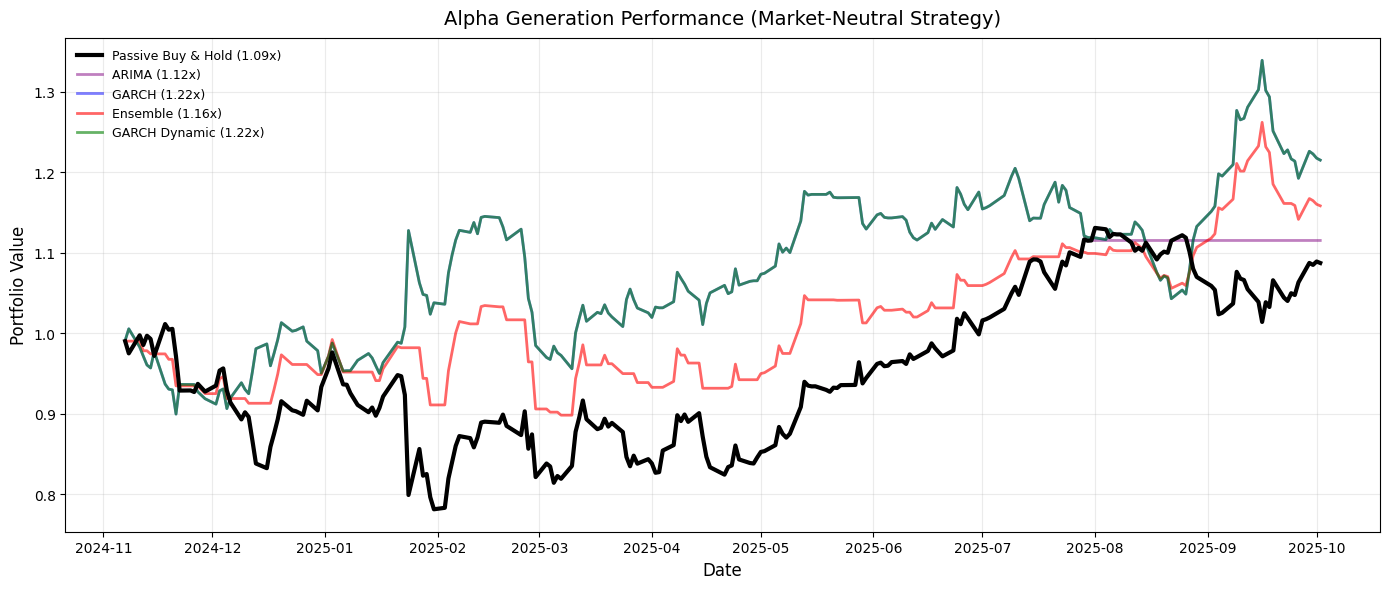

In [253]:
# ========== VISUALIZATION - PLOT 1: ALPHA PERFORMANCE ==========
plt.figure(figsize=(14, 6))

# Plot baseline first with higher visibility
plt.plot(dates_te_aligned, passive_alpha_cum, linestyle="-", color="black", 
         linewidth=3, label=f"Passive Buy & Hold ({passive_alpha_cum[-1]:.2f}x)", zorder=10)
# Other strategies with reduced opacity
plt.plot(dates_te_aligned, arima_alpha_cum, color="purple", linewidth=2,
         label=f"ARIMA ({arima_alpha_cum[-1]:.2f}x)", alpha=0.5)
plt.plot(dates_te_aligned, garch_alpha_cum, color="blue", linewidth=2,
         label=f"GARCH ({garch_alpha_cum[-1]:.2f}x)", alpha=0.5)
plt.plot(dates_te_aligned, ensemble_alpha_cum, color="red", linewidth=2,
         label=f"Ensemble ({ensemble_alpha_cum[-1]:.2f}x)", alpha=0.6)
plt.plot(dates_te_aligned, garch_dyn_alpha_cum, color="green", linewidth=2,
         label=f"GARCH Dynamic ({garch_dyn_alpha_cum[-1]:.2f}x)", alpha=0.6)

plt.title("Alpha Generation Performance (Market-Neutral Strategy)", fontsize=14, pad=10)
plt.ylabel("Portfolio Value", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend(loc="upper left", frameon=False, fontsize=9)
plt.grid(True, alpha=0.25)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.tight_layout()
plt.show()

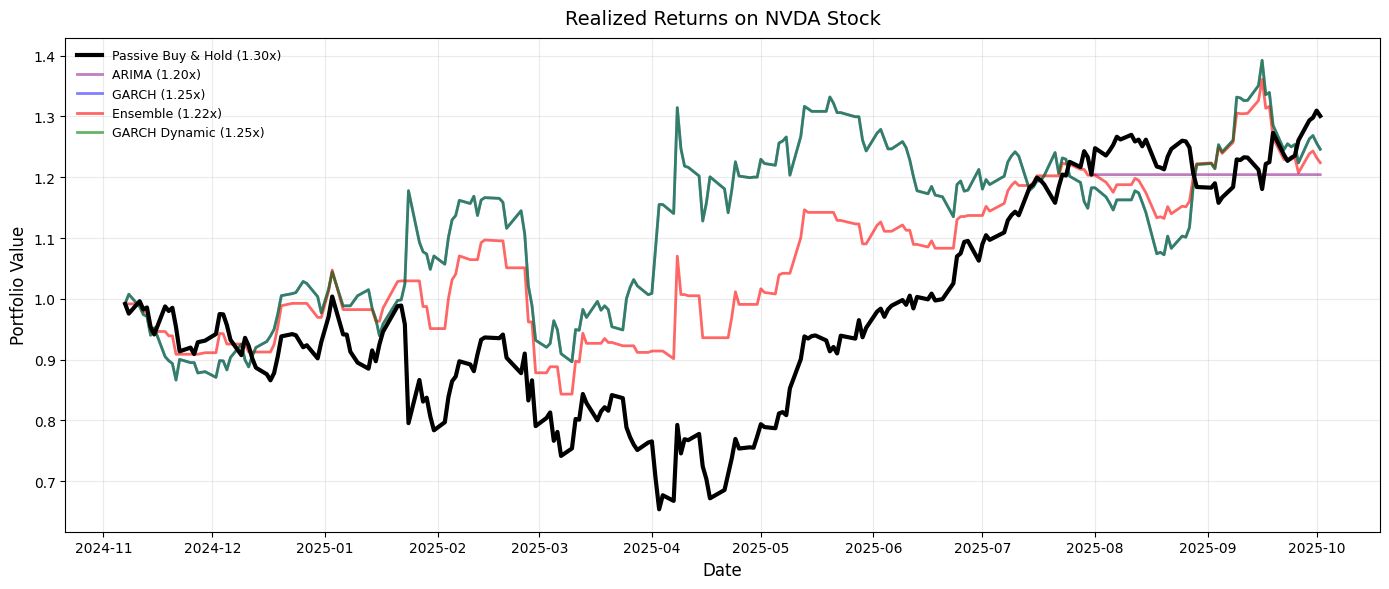

In [254]:
# ========== VISUALIZATION - PLOT 2: REALIZED RETURNS ==========
plt.figure(figsize=(14, 6))

# Plot baseline first with higher visibility
plt.plot(dates_te_aligned, passive_realized_cum, linestyle="-", color="black",
         linewidth=3, label=f"Passive Buy & Hold ({passive_realized_cum[-1]:.2f}x)", zorder=10)
# Other strategies with reduced opacity
plt.plot(dates_te_aligned, arima_realized_cum, color="purple", linewidth=2,
         label=f"ARIMA ({arima_realized_cum[-1]:.2f}x)", alpha=0.5)
plt.plot(dates_te_aligned, garch_realized_cum, color="blue", linewidth=2,
         label=f"GARCH ({garch_realized_cum[-1]:.2f}x)", alpha=0.5)
plt.plot(dates_te_aligned, ensemble_realized_cum, color="red", linewidth=2,
         label=f"Ensemble ({ensemble_realized_cum[-1]:.2f}x)", alpha=0.6)
plt.plot(dates_te_aligned, garch_dyn_realized_cum, color="green", linewidth=2,
         label=f"GARCH Dynamic ({garch_dyn_realized_cum[-1]:.2f}x)", alpha=0.6)

plt.title("Realized Returns on NVDA Stock", fontsize=14, pad=10)
plt.ylabel("Portfolio Value", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend(loc="upper left", frameon=False, fontsize=9)
plt.grid(True, alpha=0.25)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.tight_layout()
plt.show()